1. Explanation
2. Different activation functions
3. Description of dataset
4. Get Dataset
5. preprocess Dataset
6. Test Train split
7. Design neural network
8. Explanation for neural network
9. Build neural network
10. Dimensions of Neural network weights,errors,layer inputs
11. Functions for Activation Functions and Derivatives
12. Forward pass Functions
13. Backward pass Functions
14. Calculate Forward and backpropagation 
15. Predict
16. How to choose Activation functions


## 1.Explanation
 Neural Network Programming

   This is a starter code in Python 3.6 for a 2-hidden-layer neural network.
   You need to have numpy and pandas installed before running this code.

####   Below are the meaning of symbols:
  train - training dataset - can be a link to a URL or a local file
         - you can assume the last column will the label column

   train - test dataset - can be a link to a URL or a local file
         - you can assume the last column will the label column

   h1 - number of neurons in the first hidden layer

   h2 - number of neurons in the second hidden layer

   X - vector of features for each instance

   y - output for each instance

  w01, delta01, X01 - weights, updates and outputs for connection from layer 0 (input) to layer 1 (first hidden)

  w12, delata12, X12 - weights, updates and outputs for connection from layer 1 (first hidden) to layer 2 (second hidden)

   w23, delta23, X23 - weights, updates and outputs for connection from layer 2 (second hidden) to layer 3 (output layer)

   

In [179]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split





## 2.Different activation functions

tanh Formula is :$\frac{(e^x – e^{-x})}{(e^x + e^{-x})} $

ReLU formula is : f(x) = max(0,x)

sigmoid Formula is :$\frac{1}{(1 + e^{-x})} $




## 3.Description of dataset

***Attribute Information:***


1. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
2. menopause: lt40, ge40, premeno.
3. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
4. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
5. node-caps: yes, no.
6. deg-malig: 1, 2, 3.
7. breast: left, right.
8. breast-quad: left-up, left-low, right-up, right-low, central.
9. irradiat: yes, no.

***Classes***

 no-recurrence-events, recurrence-events


## 4.Get Dataset

In [180]:
header = True
np.random.seed(1)

#dataset_file="breast-cancer.csv"

dataset_file="breast-cancer.csv"
raw_input = pd.read_csv(dataset_file, header=None)
print(raw_input.head())

       0        1      2    3   4  5      6          7   8  \
0  30-39  premeno  30-34  0-2  no  3   left   left_low  no   
1  40-49  premeno  20-24  0-2  no  2  right   right_up  no   
2  40-49  premeno  20-24  0-2  no  2   left   left_low  no   
3  60-69     ge40  15-19  0-2  no  2  right    left_up  no   
4  40-49  premeno    0-4  0-2  no  2  right  right_low  no   

                      9  
0  no-recurrence-events  
1  no-recurrence-events  
2  no-recurrence-events  
3  no-recurrence-events  
4  no-recurrence-events  


## 5.preprocess dataset

In [181]:
#
# TODO: Write code for pre-processing the dataset, which would include standardization, normalization,
#   categorical to numerical, etc
#

df = raw_input

#Convert categorical attributes to numerical attributes
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes.astype('int64')

arr = df.values
print("\ncategories converted to numbers\n")
print(arr)
print("\n---------\n")
#Handle null or missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(arr)
arr = imputer.transform(arr)
print("\nmissing values filled with mean\n")
print(arr)
print("\n---------\n")
#Standardization, converting mean to 0 and standard deviation to 1
scaler = StandardScaler().fit(arr)
arr = scaler.transform(arr)
print("\nstandardixation mean=0 sd=1\n")
print(arr)
print("\n---------\n")
train_dataset = pd.DataFrame(arr)





categories converted to numbers

[[1 2 5 ... 2 0 0]
 [2 2 3 ... 5 0 0]
 [2 2 3 ... 2 0 0]
 ...
 [4 0 3 ... 3 0 1]
 [2 0 5 ... 2 0 1]
 [3 0 5 ... 2 0 1]]

---------


missing values filled with mean

[[1. 2. 5. ... 2. 0. 0.]
 [2. 2. 3. ... 5. 0. 0.]
 [2. 2. 3. ... 2. 0. 0.]
 ...
 [4. 0. 3. ... 3. 0. 1.]
 [2. 0. 5. ... 2. 0. 1.]
 [3. 0. 5. ... 2. 0. 1.]]

---------


standardixation mean=0 sd=1

[[-1.64777909  0.94072828  0.45037804 ... -0.70434692 -0.5585039
  -0.65029653]
 [-0.65772695  0.94072828 -0.49674049 ...  2.03017641 -0.5585039
  -0.65029653]
 [-0.65772695  0.94072828 -0.49674049 ... -0.70434692 -0.5585039
  -0.65029653]
 ...
 [ 1.32237733 -1.08982483 -0.49674049 ...  0.20716086 -0.5585039
   1.53776002]
 [-0.65772695 -1.08982483  0.45037804 ... -0.70434692 -0.5585039
   1.53776002]
 [ 0.33232519 -1.08982483  0.45037804 ... -0.70434692 -0.5585039
   1.53776002]]

---------



## 6.test train split

In [182]:
# train refers to the training dataset
# test refers to the testing dataset


train_test_split_size=0.10

ncols = len(train_dataset.columns)
nrows = len(train_dataset.index)
X = train_dataset.iloc[:, 0:(ncols -1)].values.reshape(nrows, ncols-1)
y = train_dataset.iloc[:, (ncols-1)].values.reshape(nrows, 1)
print("length of X[0]",len(X[0]))
#
# Find number of input and output layers from the dataset
#
input_layer_size = len(X[0])
if not isinstance(y[0], np.ndarray):
    output_layer_size = 1
else:
    output_layer_size = len(y[0])

# Split dataset into training set and testing set on the basis of test set size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_size)


length of X[0] 9


## 7.Design neural network (multiperceptron)



In [183]:
# no need to understand code
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 12
        self.horizontal_distance_between_neurons = 4
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer[w01(9x4),delta01(9x4)]', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer[deltaOut(1x1)]', fontsize = 12)
        elif layerType == 1:
            pyplot.text(x_text, self.y, 'Hidden Layer1[w12(4x2),delta12(4x2)] ', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer[w23(2x1),delta23(2x1)] ', fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()


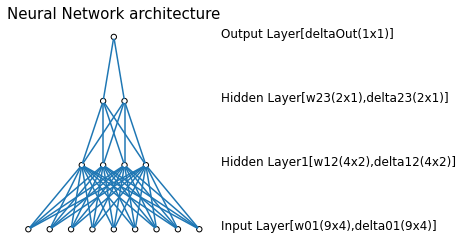

In [184]:
network = DrawNN( [9,4,2,1] )
network.draw()



## 8.Explanation for neural network

*** number of weights between layers = (no. of nodes in previous layer) x (no. of nodes in following layer)***

*** number of errors between layers = (no. of nodes in previous layer) x (no. of nodes in following layer)***

1. Input Layer:Nine Inputs from dataset each row which has nine attibutes
   

2. Hidden Layer1:four nodes
   
   w01=weights array with shape(9x4) for multiplying nine dataset inputs

   delta01=backpropagation error shape(9x4) from four nodes of Hiddenlayer1 to nine dataset inputweights

3. Hidden Layer2:Two nodes

   w12=weights array with shape(4x2) for multiplying four outputs from Hidden Layer1 

   delta01=backpropagation error shape(4x2) from two nodes of Hiddenlayer2 to four nodes of HiddenLayer1 weights

4. Output: one node

   w23=weights array with shape(2x1) for multiplying four outputs from Hidden Layer2 

   delta23=backpropagation error shape(2x1) from one node of Output to two nodes of HiddenLayer2 weights

5. deltaOut=backpropagation error shape(1x1) from one Final Output 


## 9.Build neural network

In [185]:
 # h1 and h2 represent the number of nodes in 1st and 2nd hidden layers
h1 = 4
h2 = 2



# assign random weights to matrices in network
# number of weights connecting layers = (no. of nodes in previous layer) x (no. of nodes in following layer)
w01 = 2 * np.random.random((input_layer_size, h1)) - 1
X01 = X_train
delta01 = np.zeros((input_layer_size, h1))
w12 = 2 * np.random.random((h1, h2)) - 1
X12 = np.zeros((len(X_train), h1))
delta12 = np.zeros((h1, h2))
w23 = 2 * np.random.random((h2, output_layer_size)) - 1
X23 = np.zeros((len(X_train), h2))
delta23 = np.zeros((h2, output_layer_size))
deltaOut = np.zeros((output_layer_size, 1))


## 10.dimensions of weights ,errors and inputs for different layers

In [186]:
print("\n w01 shape\n",w01.shape)

print("\n w12 shape\n",w12.shape)

print("\n w23 shape\n",w23.shape)
#print("\n w23 typw \n",type(w23))
print("\n delta01 shape\n",delta01.shape)
print("\n delta12 shape\n",delta12.shape)


print("\n delta23 shape\n",delta23.shape)
#print("\n delta23 type \n",type(delta23))
print("\n deltaOut shape\n",deltaOut.shape)

print("\n X01 shape\n",X01.shape)

print("\n X12 shape\n",X12.shape)
print("\n X23 shape\n",X23.shape)

print("\n lenx[0] \n",len(X[0]))
print("\n leny[0] \n",len(y[0]))
print("\n processed dataset\n")
#train_dataset.head(5)


 w01 shape
 (9, 4)

 w12 shape
 (4, 2)

 w23 shape
 (2, 1)

 delta01 shape
 (9, 4)

 delta12 shape
 (4, 2)

 delta23 shape
 (2, 1)

 deltaOut shape
 (1, 1)

 X01 shape
 (257, 9)

 X12 shape
 (257, 4)

 X23 shape
 (257, 2)

 lenx[0] 
 9

 leny[0] 
 1

 processed dataset



## 11.Functions for Activation function and Their derivatives 

In [187]:
# TODO: Select activation function, from sigmoid, tanh and ReLu
#
def activation(x, act="sigmoid"):
    if act == "sigmoid":
        return sigmoid(x)
    elif act == "tanh":
        return tanh(x)
    elif act == "relu":
        #print("relu")
        return relu(x)
    return None

#
# TODO: Define the function for tanh, ReLu and their derivatives
#
# def activation_derivative(x, activation="sigmoid"):
#     if activation == "sigmoid":
#         sigmoid_derivative(x)
#     elif activation == "tanh":
#         tanh_derivative(x)
#     elif activation == "relu":
#         print("relu_derivative")
#         relu_derivative(x)

def sigmoid( x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid function, indicates confidence about existing weight

def sigmoid_derivative(x):
    return x * (1 - x)

# tanh function
def tanh(x):
    return np.tanh(x)

# derivative of tanh function
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# ReLu function
def relu(x):
    return np.maximum(0, x)

# derivative of Relu function (Assuming a derivative value of 0 for x=0)
def relu_derivative( x):
    #print("relu derivative")
    return (x > 0) * 1





## 12.Forward pass calculations function

In [188]:

def forward_pass(input,act):
    #act="sigmoid"
    # pass our inputs through our neural network
    in1 = np.dot(input, w01)
    X12 = activation(in1, act)
    in2 = np.dot(X12, w12)
    X23 = activation(in2, act)
    in3 = np.dot(X23, w23)
    out = activation(in3, act)
    return out



## 13.backpropagation function

In [189]:
def backward_pass(out,w23,w12,w01,act):
    #act="sigmoid"
    # pass our inputs through our neural network
    deltaOut=compute_output_delta(out, act)
    delta23=compute_hidden_layer2_delta(act)
    delta12=compute_hidden_layer1_delta(act)
    #print("before return backward_pass")
    update_layer2 = learning_rate * X23.T.dot(deltaOut)
    update_layer1 = learning_rate * X12.T.dot(delta23)
    update_input = learning_rate * X01.T.dot(delta12)
    w23 = w23 + update_layer2
    w12 = w12 + update_layer1
    w01 = w01 + update_input
    return 

# TODO: Implement other activation functions
def compute_output_delta(out, activation="sigmoid"):
    diff = y_train - out
    delta_output = None
    if activation == "sigmoid":
        delta_output = diff * (sigmoid_derivative(out))
    elif activation == "tanh":
        delta_output = diff * (tanh_derivative(out))
    elif activation == "relu":
        delta_output = diff * (relu_derivative(out))
    return delta_output

# TODO: Implement other activation functions
def compute_hidden_layer2_delta(activation="sigmoid"):
    #deltaOut=deltaOut.T
    prod = deltaOut.dot(w23.T)
    delta_hidden_layer2 = None
    if activation == "sigmoid":
        delta_hidden_layer2 = prod * (sigmoid_derivative(X23))
    elif activation == "tanh":
        delta_hidden_layer2 = prod * (tanh_derivative(X23))
    elif activation == "relu":
        delta_hidden_layer2 = prod * (relu_derivative(X23))
    return delta_hidden_layer2

# TODO: Implement other activation functions
def compute_hidden_layer1_delta(activation="sigmoid"):
    # print("inside hidden_layer1_delta")
    # print("delta23 shape",delta23.shape)
    # print("w12 shape",w12.shape)
    d23=delta23.transpose()
    #print("d23 shape",d23.shape)
    prod = d23.dot(w12.T)
    delta_hidden_layer1 = None
    if activation == "sigmoid":
        delta_hidden_layer1 = prod * (sigmoid_derivative(X12))
    elif activation == "tanh":
        delta_hidden_layer1 = prod * (tanh_derivative(X12))
    elif activation == "relu":
        delta_hidden_layer1 = prod * (relu_derivative(X12))
    #print("before return compute_hidden_layer1_delta")
    return delta_hidden_layer1




## 14. Calculate Forward  and back propagation for neural network

In [190]:
#act = "tanh"
act = "relu"
#act = "sigmoid"


In [191]:

#print(type(X_train))
max_iterations = 1000
learning_rate = 0.05
for iteration in range(max_iterations):
    out = forward_pass(X_train,act)
    #print(out.shape)
    error = 0.5 * np.power((out - y_train), 2)
    #print("\n before backpass \n")
    # print(deltaOut.shape)
    # print(delta23.shape)
    # print(delta12.shape)

    backward_pass(out,w23,w12,w01,act)
print("\n activation function used \n",act) 
print("Training on " + str((1-train_test_split_size)*100) + "% data and testing on " + str(train_test_split_size*100) + "% data using the activation function as " + str(act))

print("After " + str(max_iterations) + " iterations, and having learning rate as " + str(learning_rate) + ", the total error is " + str(np.sum(error)))
print("\nThe final weight vectors are (starting from input to output layers)\n")
print("\n weights w01 \n",w01)
print("\n weights w12 \n",w12)
print("\n weights w23 \n",w23)



 activation function used 
 relu
Training on 90.0% data and testing on 10.0% data using the activation function as relu
After 1000 iterations, and having learning rate as 0.05, the total error is 126.18814749780508

The final weight vectors are (starting from input to output layers)


 weights w01 
 [[ 0.61667749 -0.26324629  0.21841398 -0.93030455]
 [-0.29084554 -0.84296007  0.3863704  -0.97457467]
 [-0.08090943  0.92263452 -0.33162956 -0.05583316]
 [-0.7892175   0.00615181  0.77137972  0.06875468]
 [-0.43704647 -0.29083062  0.7925605  -0.51702172]
 [-0.95223181  0.93145361 -0.1400642  -0.30742297]
 [ 0.15413526 -0.74694768  0.90008662 -0.37277834]
 [ 0.90566225 -0.56321354 -0.5025996   0.72760359]
 [-0.52946334  0.63020011  0.08779447 -0.61747946]]

 weights w12 
 [[ 0.17767988 -0.90372641]
 [-0.96825404 -0.90057797]
 [-0.20116942  0.15380792]
 [ 0.73503491  0.57232448]]

 weights w23 
 [[-0.49059449]
 [-0.83549019]]


## 15.prediction

In [192]:
out = forward_pass(X_test,act)
error = 0.5 * np.power((out - y_test), 2)
print("\n prediction error \n",np.sum(error))



 prediction error 
 16.811852502194906


## 16.how to choose activation function

https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=Tanh%20Hidden%20Layer%20Activation%20Function&text=1%20to%201.-,The%20larger%20the%20input%20(more%20positive)%2C%20the%20closer%20the,x%20%2B%20e%5E%2Dx)
